In [490]:
import pandas as pd
import numpy as np

In [491]:
CCData = pd.read_csv("creditcard.csv") 
CCData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [492]:
CCData['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

We can see there are 284315 legitimate cases, and 492 of the cases are a fraud case

In [493]:
MV = CCData.isnull().sum() #Returns the missing values count for each column
MV

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Total missing values:

In [494]:
TMV = CCData.isnull().sum().sum() #Returns the total count of missing values
TMV

np.int64(0)

In [495]:
CCData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [496]:
CCData[['Time', 'Amount']].describe() #returns a statistical summary of the data

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [497]:
import sklearn
from sklearn.preprocessing import StandardScaler

BEFORE we scale the data, the credit card fraud detection is highly imbalanced (284315 not fraud case vs 492 fraud case), so we need to fix that!

In [498]:
#First we separated the data into Notfraud and fraud (0 and 1)
Notfraud =CCData[CCData.Class==0]
Fraud = CCData[CCData.Class==1]
NotfraudRandom= Notfraud.sample(492) # Then we took 492 random samples from Notfraud data
NewCC=pd.concat([NotfraudRandom,Fraud],axis=0) #Concatenate the 492 random non-fraud samples with the fraud samples 
#And with that we balanced the data!
NewCC[['Time', 'Amount']].describe()

,Time,Amount
count,984.000000,984.000000
mean,87482.248984,111.397409
std,48715.776589,261.256444
min,406.000000,0.000000
25%,44861.500000,1.535000
50%,80364.500000,19.000000
75%,135096.750000,99.990000
max,170943.000000,3167.740000


In [499]:
S = StandardScaler() 

Now we are going to separate the features from the target 

In [500]:
X = NewCC.drop(['Class'], axis=1) #Features 
Y = NewCC['Class'] #Target
X[['Time','Amount']].describe().round(3)

,Time,Amount
count,984.000,984.000
mean,87482.249,111.397
std,48715.777,261.256
min,406.000,0.000
25%,44861.500,1.535
50%,80364.500,19.000
75%,135096.750,99.990
max,170943.000,3167.740


In [501]:
X[['Time','Amount']] = S.fit_transform(NewCC[['Time', 'Amount']]) #Scaling the data

In [502]:
X[['Time','Amount']].describe().round(3)

,Time,Amount
count,984.000,984.000
mean,0.000,-0.000
std,1.001,1.001
min,-1.788,-0.427
25%,-0.875,-0.421
50%,-0.146,-0.354
75%,0.978,-0.044
max,1.714,11.705


- We scaled "Amount" and "Time" columns

- We didn't scale the columns V1-V28 because they are already have been scaled

- We didn't scale the feature "Class" because it's a target variable and should never be scaled 

- Why do we need to scale the data?

To ensure that all the numarical features have similar scale

- What happened exactly after scaling the "Amount" and "Time" features?

Centering on Median (median is now zero for both "Time" and "amount")

  
- We're now ready for Dimensionality Reduction

# Dimensionality Reduction

In [503]:
X[['Time','Amount']].describe().round(3)

,Time,Amount
count,984.000,984.000
mean,0.000,-0.000
std,1.001,1.001
min,-1.788,-0.427
25%,-0.875,-0.421
50%,-0.146,-0.354
75%,0.978,-0.044
max,1.714,11.705


In [504]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 151161 to 281674
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22 

In [505]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

After dropping the target column we want to find the minimum number of components preserving 90–95% variance

- PCA

In [506]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Text(0, 0.5, 'cumulative explained variance')

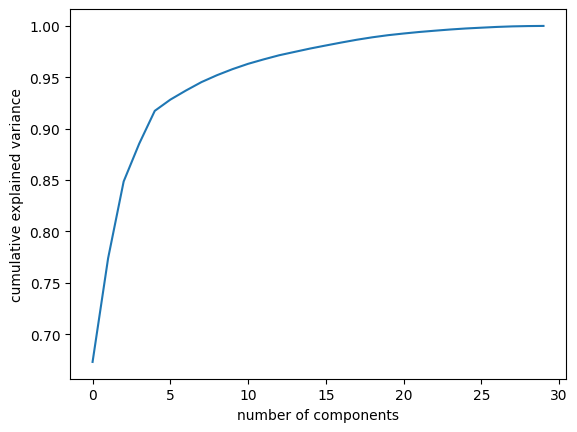

In [507]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [508]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Use {n_components_95} components for 95% variance")

Use 9 components for 95% variance


In [509]:
X.shape #Data shape before PCA

(984, 30)

In [510]:
pca = PCA(n_components=9)
RFeatures = pca.fit_transform(X)

In [511]:
RFeatures.shape #Data shape after PCA

(984, 9)

In [512]:
PCA_2d = PCA(n_components = 2)
result = PCA_2d.fit_transform(X)

In [513]:
result.shape

(984, 2)

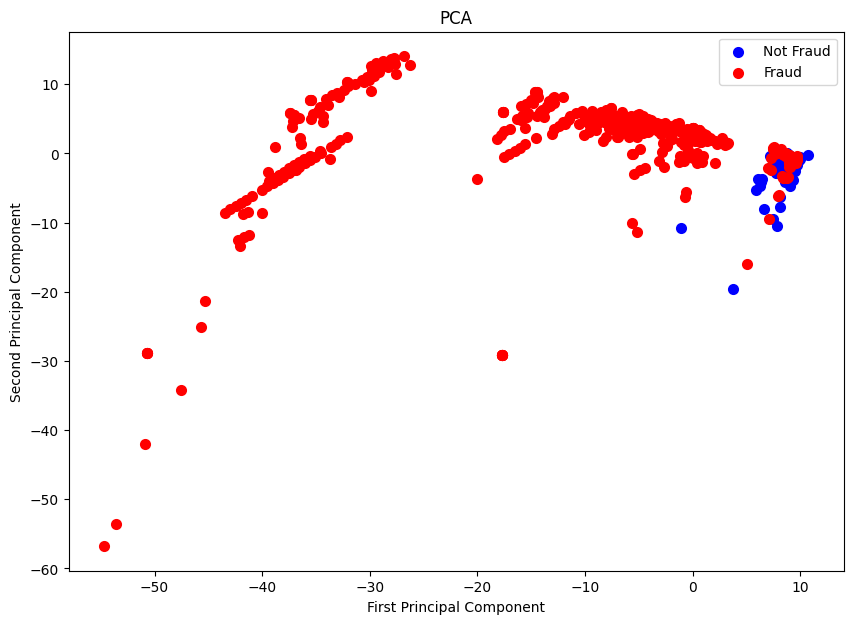

In [514]:
plt.figure(figsize=(10, 7))
Fraud = result[Y == 1]
NotFraud = result[Y == 0]

plt.scatter(NotFraud[:,0], NotFraud[:,1], c='blue', label='Not Fraud', linewidths=2)
plt.scatter(Fraud[:,0], Fraud[:,1], c='red', label='Fraud', linewidths=2)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA")
plt.legend()

t-SNE 

We will use t-SNE to plot the difference before and after clustering

But first we should cluster the data!

In [515]:
from sklearn.manifold import TSNE

In [516]:
TX = TSNE(n_components=2).fit_transform(X)

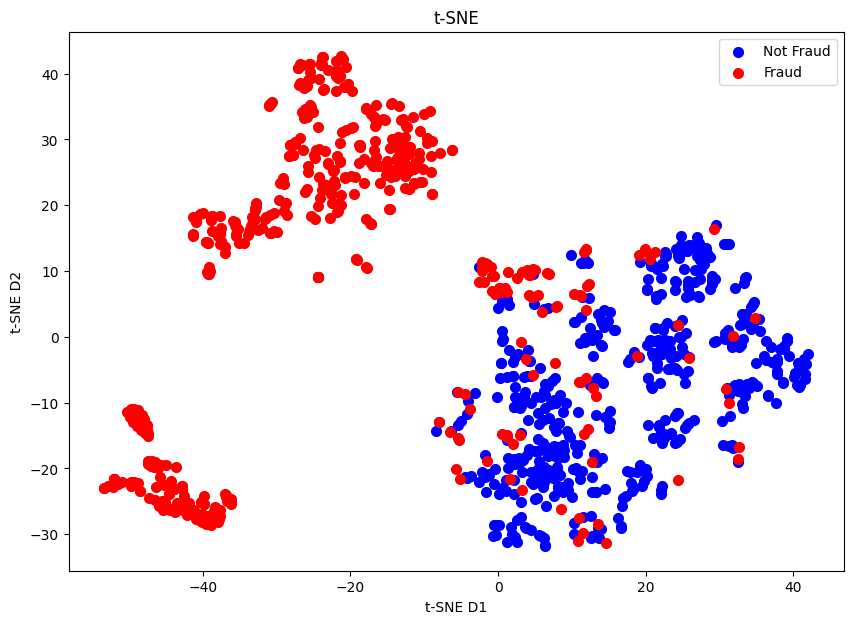

In [517]:
TXFraud = TX[Y == 1]
TXNotFraud = TX[Y == 0]
plt.figure(figsize=(10, 7))
plt.scatter(TXNotFraud[:,0], TXNotFraud[:,1], c='blue', label='Not Fraud', linewidths=2)
plt.scatter(TXFraud[:,0], TXFraud[:,1], c='red',label='Fraud', linewidths=2)

plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")
plt.title("t-SNE")
plt.legend()

Now this is the plot before clustering, now let's how the plot will look like after we cluster the data!

# 1- K-Means

In [518]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

#### Determining the Optimal Number of Clusters (k)


In order to find the optimal number of K we are going to use the **elbow method** and **Silhouette Score**

**elbow method**

In [519]:
inertia = []
K = range(2,21)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(RFeatures)
 inertia.append(kmeans.inertia_)

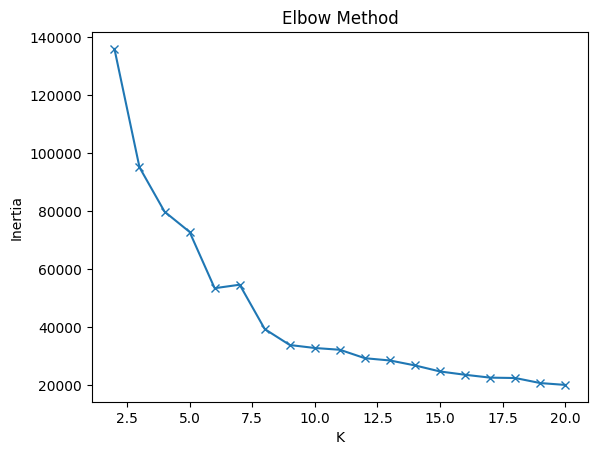

In [520]:
plt.plot(K,inertia, marker = "x")
plt.xlabel("K") 
plt.ylabel("Inertia") 
plt.title("Elbow Method")
plt.show()

We can see a sharp drop in inertia around "K = 5" so 5 may ne the optimal number of clusters

**Silhouette Score**

In [521]:
silhouette= []
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(RFeatures)
    cluster_labels = kmeans.labels_
    silhouette.append(silhouette_score(RFeatures, cluster_labels))

Text(0.5, 1.0, 'Silhouette')

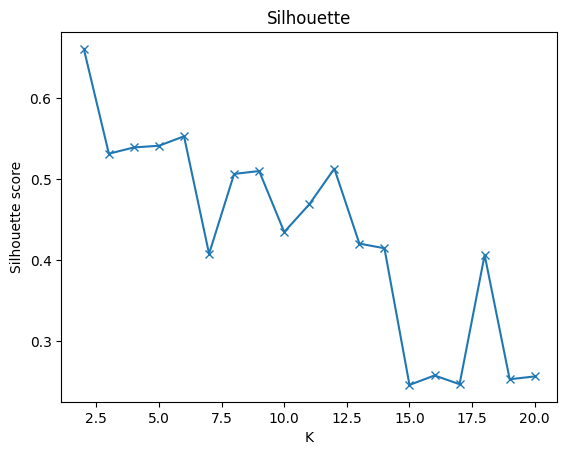

In [522]:
plt.plot(K,silhouette, marker = "x")
plt.xlabel("K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette")

We can see that the highest Silhouette Score is at "K = 2", but! the score  is still high at "K = 5", and after "K = 6" the score decline, so! considering the elbow method and silhouette score, we are going to choose "K = 5" 

In [523]:
KM_t0 = time.time()
means = KMeans(n_clusters=5, random_state=42)
Cluster = kmeans.fit_predict(RFeatures)
KM_t1 = time.time()

#### Plotting using t-SNE

In [524]:
PLOT = TSNE(n_components=2).fit_transform(RFeatures)

Text(0, 0.5, 't-SNE D2')

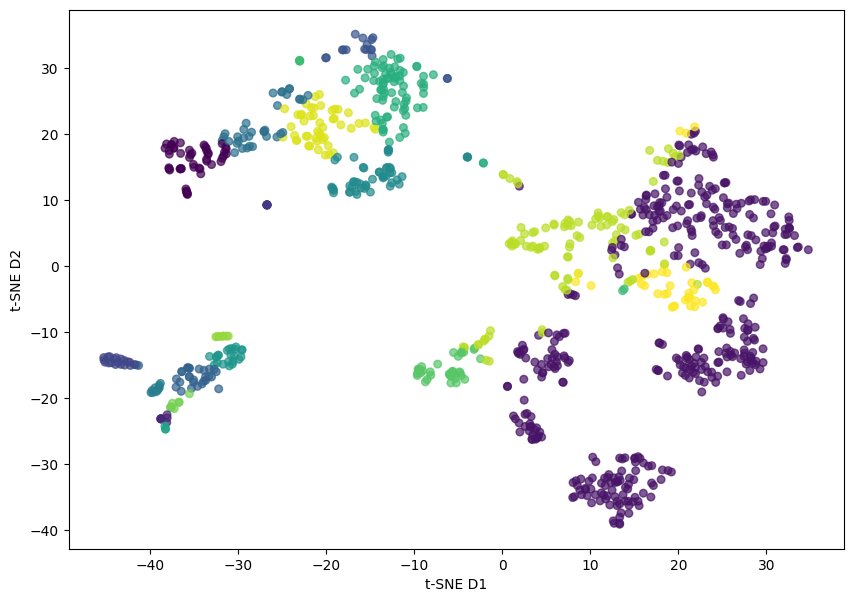

In [525]:
plt.figure(figsize=(10, 7))
plt.scatter(PLOT[:, 0], PLOT[:, 1], s = 30, c=Cluster, alpha=0.7)
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")

#### Create Silhouette diagrams for at least 3 values of k.

#### Comparison between KMeans and KMeans++

Now before comparison we should know what's "KMeans"

"K-Means is a clustering algorithm that partitions a dataset into K distinct clusters. The goal is to group similar data points together while ensuring the clusters are as distinct as possible."

The standard KMeans randomly choose K centroids from the dataset.

Unlike KMeans++ that strategically selects well-spread initial centroids

And for cluster quality the KMeans++ produces better clusters due to **better starting points**

And for the convergence speed the KMeans also win here due to **improved initialization**

In [526]:
Standardkmeans = KMeans(n_clusters=5,init='random', n_init=50 ,random_state=42)
Standardkmeans.fit_predict(RFeatures)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [527]:
Standardkmeans.inertia_

62336.18533227579

In [528]:
KMeans_plus = KMeans(n_clusters=5, n_init=50 ,random_state=42)
KMeans_plus.fit_predict(RFeatures)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [529]:
KMeans_plus.inertia_

60693.00235804798

We can see that KMeans++ has a lower inertia than KMeans 

Now for the convergence speed:

In [530]:
Standardkmeans.n_iter_

31

In [531]:
KMeans_plus.n_iter_

7

KMeans++ had less iterations than the standard KMeans wich means higher convergence speed for KMeans++

In [532]:
from sklearn.cluster import MiniBatchKMeans

In [533]:
t0 = time.time()
KMeans_plus_test = KMeans(n_clusters=5, n_init=50 ,random_state=42)
KMeans_plus_test.fit_predict(RFeatures)
t1 = time.time()

In [534]:
print("KMeans {:.2} s".format(t1 - t0))

KMeans 0.19 s


In [535]:
t0 = time.time()
MINBKMeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=100)
MINBKMeans.fit_predict(RFeatures)
t1 = time.time()

In [536]:
print("MiniBatchKMeans {:.2} s".format(t1 - t0))

MiniBatchKMeans 0.044 s


We can see that the MiniBatchKMeans is much faster than KMeans, it took MiniBatchKMeans 0.12 seconds while KMeans needed 2 seconds 

And for wich algorithm had more accuracy score:

In [537]:
silhouette_score(RFeatures, KMeans_plus_test.labels_)

np.float64(0.5506988914636607)

In [538]:
silhouette_score(RFeatures, MINBKMeans.labels_)

np.float64(0.48818009212655833)

MMiniBatchKMeans accuracy score is slightly less than KMeans score but it's worth it to lose a little accuracy points to get a much better performance 

# DBSCAN Clustering

In [539]:
from sklearn.cluster import DBSCAN

First we must pick the optimal values for our parameters (eps and min_samples)

and we will grid search between random values to see the optimal values for both eps and min_samples

In order to pick the optimal value for eps we are going to search betweem these values and plot them and compare them  

for eps we will choose: 2, 4, 5

and for min_samples we will choose: 5, 10, 15

#### 1- eps = 2, minPts = 5

In [540]:
dbs1 = DBSCAN(eps=2, min_samples=5)
dbl1 = dbs1.fit_predict(RFeatures)

Text(0, 0.5, 't-SNE D2')

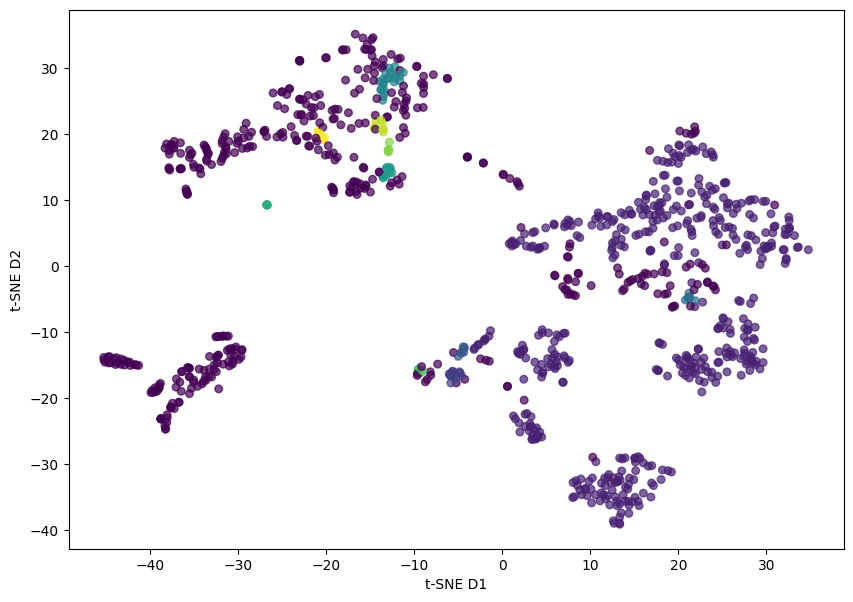

In [541]:
DBSPLOT= TSNE(n_components=2, random_state=42).fit_transform(RFeatures)
plt.figure(figsize=(10, 7))
plt.scatter(DBSPLOT[:, 0], DBSPLOT[:, 1], s = 30, c=dbl1, alpha=0.7)
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")

In [542]:
list(dbl1).count(-1) #The total count of noise points

429

In [543]:
n_clusters = len(set(dbl1)) - (1 if -1 in dbl1 else 0) # the number of clusters
n_clusters

11

#### 2- eps = 2, minPts = 10

In [544]:
dbs2 = DBSCAN(eps=2, min_samples=10)
dbl2 = dbs2.fit_predict(RFeatures)

Text(0, 0.5, 't-SNE D2')

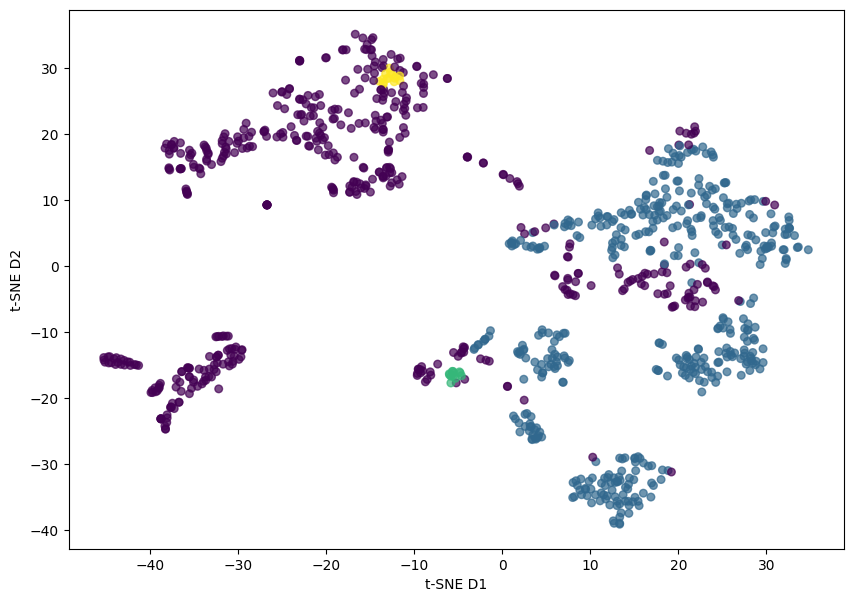

In [545]:
DBSPLOT2= TSNE(n_components=2, random_state=42).fit_transform(RFeatures)
plt.figure(figsize=(10, 7))
plt.scatter(DBSPLOT2[:, 0], DBSPLOT2[:, 1], s = 30, c=dbl2, alpha=0.7)
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")

In [546]:
list(dbl2).count(-1) #The total count of noise points

499

In [547]:
n_clusters = len(set(dbl2)) - (1 if -1 in dbl2 else 0) # the number of clusters
n_clusters

3

#### 3- eps = 2, minPts = 15

In [548]:
dbs3 = DBSCAN(eps=2, min_samples=15)
dbl3 = dbs3.fit_predict(RFeatures)

Text(0, 0.5, 't-SNE D2')

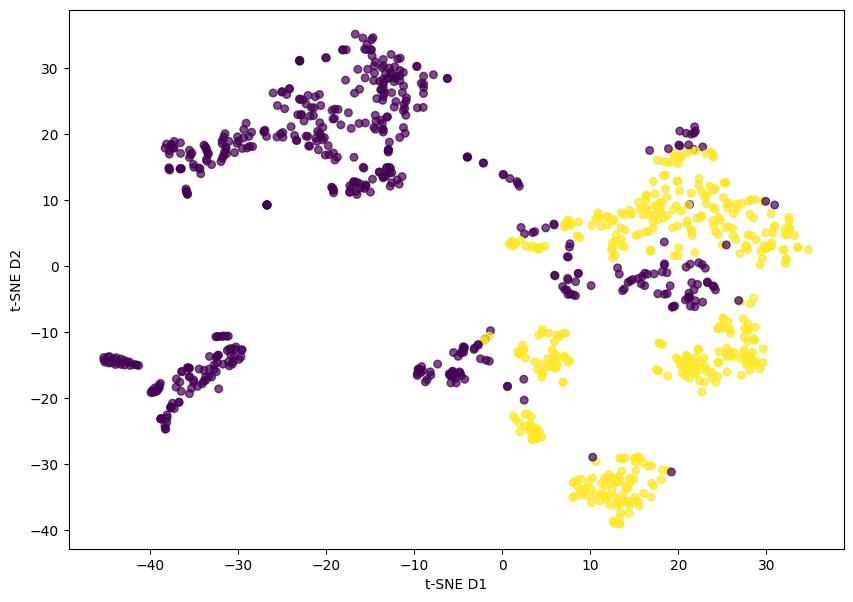

In [549]:
DBSPLOT3= TSNE(n_components=2, random_state=42).fit_transform(RFeatures)
plt.figure(figsize=(10, 7))
plt.scatter(DBSPLOT3[:, 0], DBSPLOT3[:, 1], s = 30, c=dbl3, alpha=0.7)
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")

In [550]:
list(dbl3).count(-1) #The total count of noise points

542

In [551]:
n_clusters = len(set(dbl3)) - (1 if -1 in dbl3 else 0) # the number of clusters
n_clusters

1

#### 4- eps = 3, minPts = 5

In [552]:
dbs4 = DBSCAN(eps=3, min_samples=5)
dbl4 = dbs4.fit_predict(RFeatures)

Text(0, 0.5, 't-SNE D2')

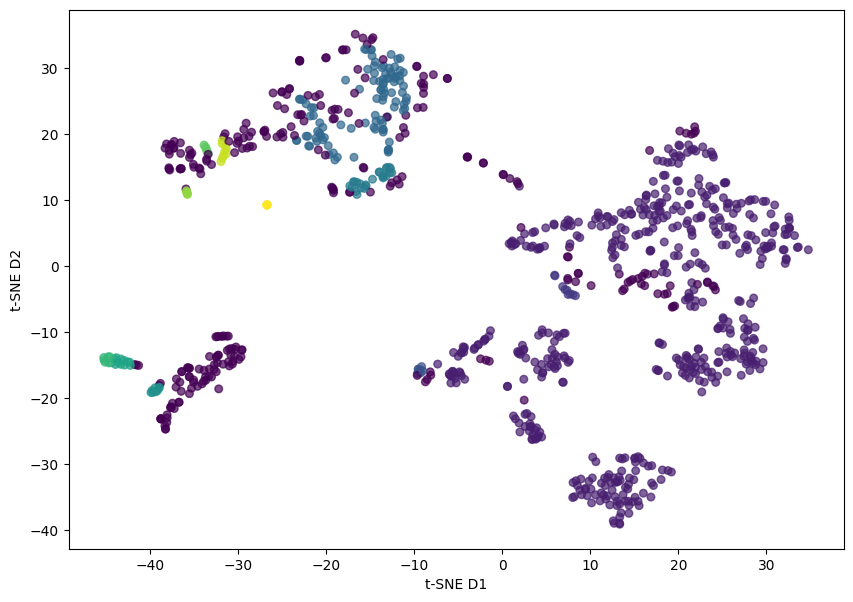

In [553]:
DBSPLOT4= TSNE(n_components=2, random_state=42).fit_transform(RFeatures)
plt.figure(figsize=(10, 7))
plt.scatter(DBSPLOT4[:, 0], DBSPLOT4[:, 1], s = 30, c=dbl4, alpha=0.7)
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")

In [554]:
list(dbl4).count(-1) #The total count of noise points

275

In [555]:
n_clusters = len(set(dbl4)) - (1 if -1 in dbl4 else 0) # the number of clusters
n_clusters

12

#### 5- eps = 3, minPts = 10

In [556]:
dbs5 = DBSCAN(eps=3, min_samples=10)
dbl5 = dbs5.fit_predict(RFeatures)

Text(0, 0.5, 't-SNE D2')

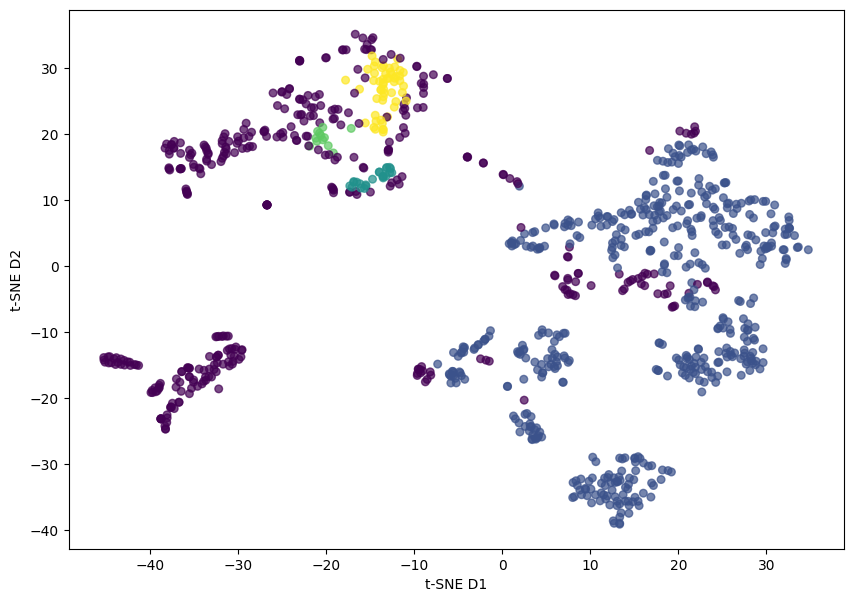

In [557]:
DBSPLOT5= TSNE(n_components=2, random_state=42).fit_transform(RFeatures)
plt.figure(figsize=(10, 7))
plt.scatter(DBSPLOT5[:, 0], DBSPLOT5[:, 1], s = 30, c=dbl5, alpha=0.7)
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")

In [558]:
list(dbl5).count(-1) #The total count of noise points

380

In [559]:
n_clusters = len(set(dbl5)) - (1 if -1 in dbl5 else 0) # the number of clusters
n_clusters

4

#### 6- eps = 3, minPts = 15

In [560]:
dbs6 = DBSCAN(eps=3, min_samples=15)
dbl6 = dbs6.fit_predict(RFeatures)

Text(0, 0.5, 't-SNE D2')

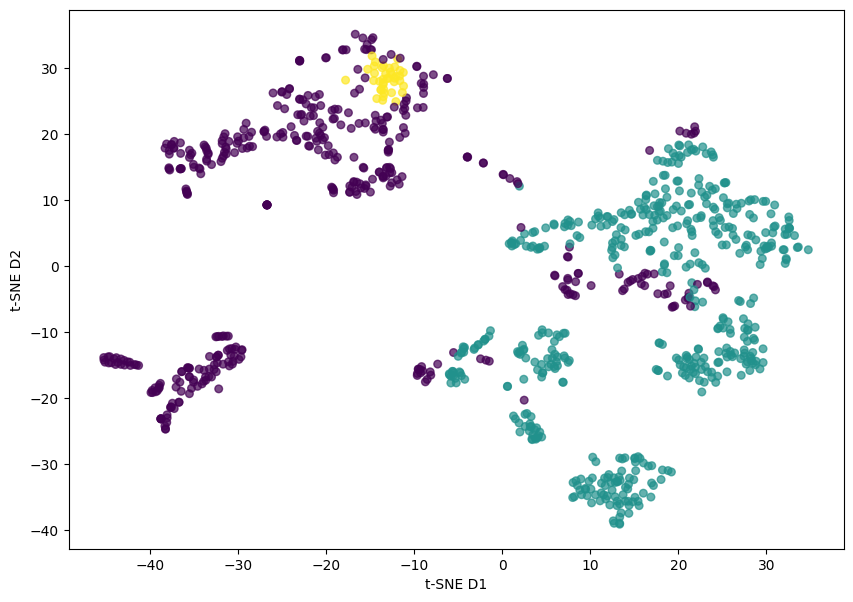

In [561]:
DBSPLOT6= TSNE(n_components=2, random_state=42).fit_transform(RFeatures)
plt.figure(figsize=(10, 7))
plt.scatter(DBSPLOT6[:, 0], DBSPLOT6[:, 1], s = 30, c=dbl6, alpha=0.7)
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")

In [562]:
list(dbl6).count(-1) #The total count of noise points

435

In [563]:
n_clusters = len(set(dbl6)) - (1 if -1 in dbl6 else 0) # the number of clusters
n_clusters

2

#### 7- eps = 4, minPts = 5

In [564]:
dbs7 = DBSCAN(eps=4, min_samples=5)
dbl7 = dbs7.fit_predict(RFeatures)

Text(0, 0.5, 't-SNE D2')

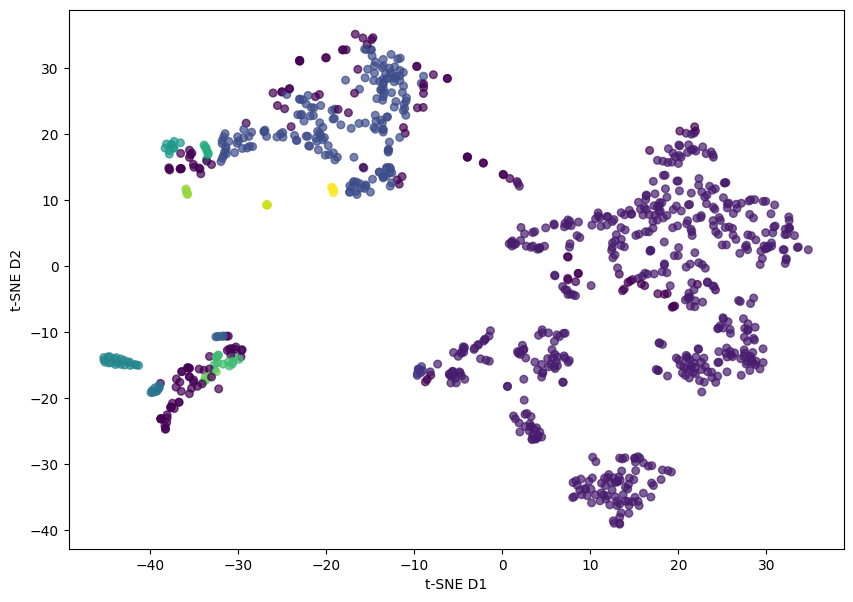

In [565]:
DBSPLOT7= TSNE(n_components=2, random_state=42).fit_transform(RFeatures)
plt.figure(figsize=(10, 7))
plt.scatter(DBSPLOT7[:, 0], DBSPLOT7[:, 1], s = 30, c=dbl7, alpha=0.7)
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")

In [566]:
list(dbl7).count(-1) #The total count of noise points

155

In [567]:
n_clusters = len(set(dbl7)) - (1 if -1 in dbl7 else 0) # the number of clusters
n_clusters

13

#### 8- eps = 4, minPts = 10

In [568]:
DBS_T0 = time.time()
dbs8 = DBSCAN(eps=4, min_samples=10)
dbl8 = dbs8.fit_predict(RFeatures)
DBS_T1 = time.time()

Text(0, 0.5, 't-SNE D2')

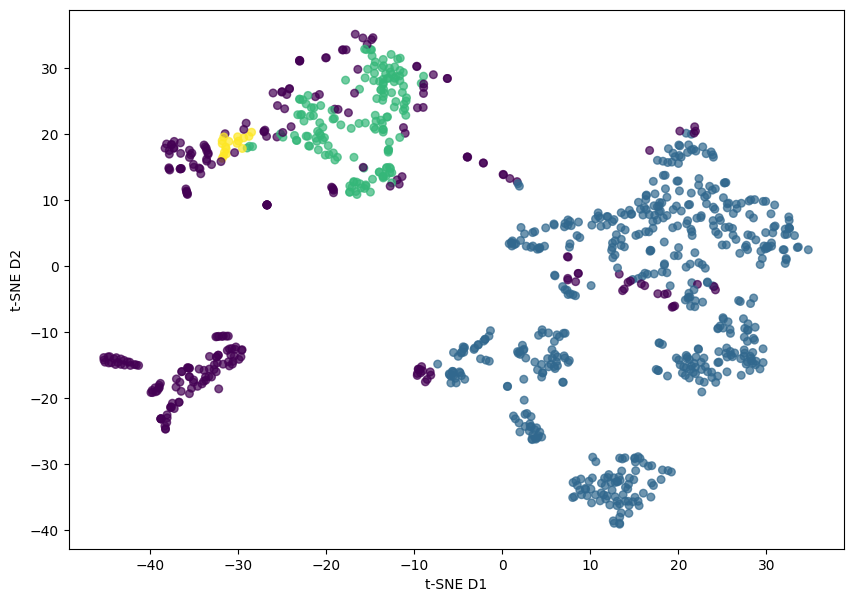

In [569]:
DBSPLOT8= TSNE(n_components=2, random_state=42).fit_transform(RFeatures)
plt.figure(figsize=(10, 7))
plt.scatter(DBSPLOT8[:, 0], DBSPLOT8[:, 1], s = 30, c=dbl8, alpha=0.7)
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")

In [570]:
CASE8 =  list(dbl8).count(-1) #The total count of noise points
CASE8

267

In [571]:
n_clusters8 = len(set(dbl8)) - (1 if -1 in dbl8 else 0) # the number of clusters
n_clusters8

3

#### 9- eps = 4, minPts = 15

In [572]:
dbs9 = DBSCAN(eps=4, min_samples=15)
dbl9 = dbs9.fit_predict(RFeatures)

Text(0, 0.5, 't-SNE D2')

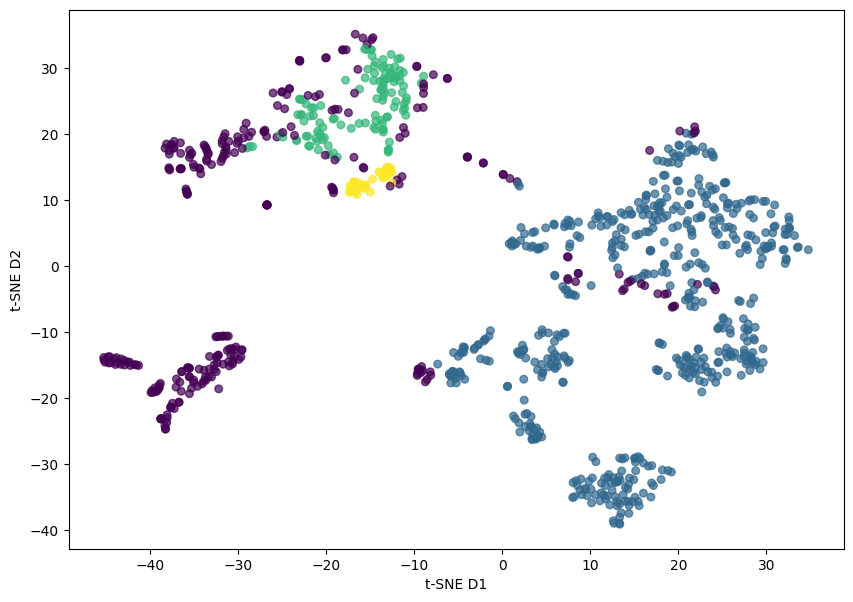

In [573]:
DBSPLOT9= TSNE(n_components=2, random_state=42).fit_transform(RFeatures)
plt.figure(figsize=(10, 7))
plt.scatter(DBSPLOT9[:, 0], DBSPLOT9[:, 1], s = 30, c=dbl9, alpha=0.7)
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")

In [574]:
list(dbl9).count(-1) #The total count of noise points

292

In [575]:
n_clusters = len(set(dbl9)) - (1 if -1 in dbl9 else 0) # the number of clusters
n_clusters

3

Now that we calculated how much noise points and clusters do each case hava

we say that the case 8 where eps = 4 and min_samples = 10 are the best choice and we will compare it with KMeans now

Now on how the noises are classified, we took each point and saw it's value so if dbl8 == -1 then that means that this point is a noise and it's not clustered 

#### comparison between KMeans and DBSCAN

First we will plot both of them

DBSCAN:

Text(0, 0.5, 't-SNE D2')

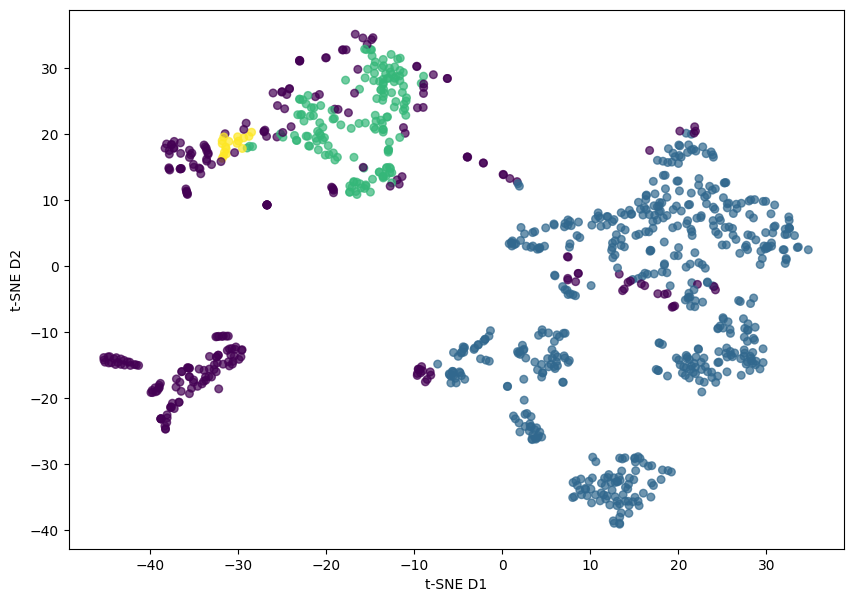

In [576]:
DBSPLOT8= TSNE(n_components=2, random_state=42).fit_transform(RFeatures)
plt.figure(figsize=(10, 7))
plt.scatter(DBSPLOT8[:, 0], DBSPLOT8[:, 1], s = 30, c=dbl8, alpha=0.7)
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")

KMeans:

Text(0, 0.5, 't-SNE D2')

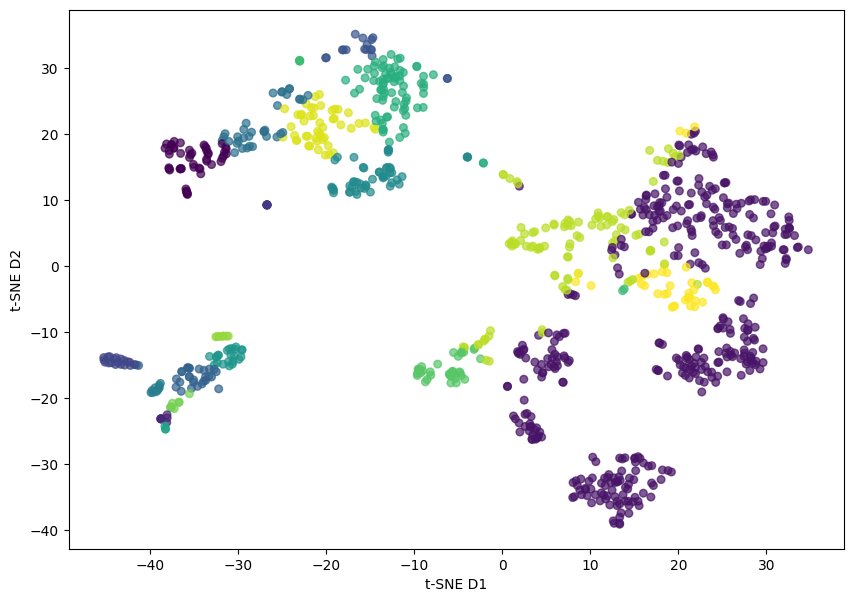

In [577]:
plt.figure(figsize=(10, 7))
plt.scatter(PLOT[:, 0], PLOT[:, 1], s = 30, c=Cluster, alpha=0.7)
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")

1- Number of clusters:

DBSCAN in case 8 formed:

In [578]:
n_clusters8

3

KMeans formed 5 clusters 

2- Speed:

DBSCAN algorithm speed: 

In [579]:
print("DBSCAN {:.2} s".format(DBS_T1 - DBS_T0))

DBSCAN 0.042 s


KMeanse algorithm spead:

In [580]:
print("KMeans {:.2} s".format(KM_t1 - KM_t0))

KMeans 0.013 s


3- Noise handling:

DBSCAN (in case 8) detected: 

In [581]:
CASE8

267

And outliers was labelled as "-1"

KMeans: didn't detect any noise point

and assigned outlieres to clusters 

# Anomaly Detection

#### 1- Isolation Forest

In [582]:
X_new = CCData.drop(['Class'], axis=1) #Features 
Y_new = CCData['Class']
X_new[['Time','Amount']] = S.fit_transform(X_new[['Time', 'Amount']]) #Scaling the data

Text(0, 0.5, 'cumulative explained variance')

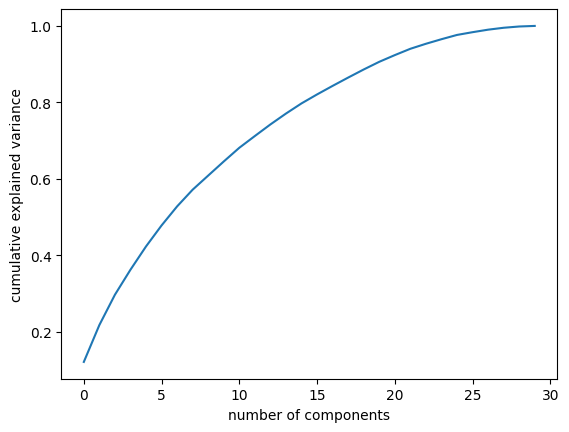

In [583]:
#Apply PCA on the original data
pca_new = PCA().fit(X_new)
plt.plot(np.cumsum(pca_new.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [584]:
cumulative_variance = np.cumsum(pca_new.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Use {n_components_95} components for 95% variance")

Use 23 components for 95% variance


In [585]:
pcA = PCA(n_components=23)
RFeatures_new = pca.fit_transform(X_new)

In [586]:
RFeatures_new.shape

(284807, 9)

In [587]:
from sklearn.ensemble import IsolationForest

In [588]:
Iso = IsolationForest(contamination=0.001, random_state=42)
IsoPred = Iso.fit_predict(X_new)
IsoPred = np.where(IsoPred == -1, 1, 0)

In [589]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [590]:
confusion_matrix(Y_new, IsoPred)

array([[284113,    202],
       [   409,     83]])

In [591]:
precision_score(Y_new, IsoPred) # 83 / (83 + 202) ≈ 0.29

0.2912280701754386

In [602]:
recall_score(Y_new, IsoPred) # 83 / (83 + 409) ≈ 0.16

0.16869918699186992

In [603]:
f1_score(Y_new, IsoPred)

0.21364221364221364

#### 2- One-Class SVM

In [594]:
from sklearn.svm import OneClassSVM
oc = OneClassSVM(kernel='rbf', gamma='scale', nu=0.001)
svmPreds = oc.fit_predict(X_new)

In [597]:
svmPreds = np.where(svmPreds == -1, 1, 0)

In [598]:
confusion_matrix(Y_new, svmPreds)

array([[283173,   1142],
       [   377,    115]])

In [599]:
precision_score(Y_new, svmPreds) #115 / (115 + 1142) ≈ 0.091

0.09148766905330151

In [600]:
recall_score(Y_new, svmPreds) #115 / (115 + 377) ≈ 0.23

0.23373983739837398

In [601]:
f1_score(Y_new, svmPreds)

0.13150371640937678

# Isolation Forest's confusion_matrix

True negative: 284,113 legitimate transactions were classified correctly

False positive: 202 legit transactions falsely flagged as fraud

False negative: 409 frauds transactions were classified as legitimate

True positive: 83 frauds correctly caught 

#  One-Class SVM's confusion_matrix

True negative: 283,173  legitimate transactions were classified correctly

False positive: 1,142  legit transactions falsely flagged as fraud

False negative: 377  frauds transactions were classified as legitimate

True positive: 115  frauds correctly caught 